In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
import SimpSOM as sps
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
df = pd.read_excel('cars.xlsx')
df.head()

,buyer,car,price,body,mileage,engV,engType,registration,year,model,drive
0,1964,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,460,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,1283,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,604,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,298,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [4]:
df.isnull().sum()

buyer             0
car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

In [5]:
df.shape

(9576, 11)

In [6]:
df['drive'].value_counts()

front    5188
full     2500
rear     1377
Name: drive, dtype: int64

In [7]:
df['engV'].fillna(df['engV'].mean(), inplace=True)
df['drive'].fillna('front', inplace=True)
df.isnull().sum()

buyer           0
car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

In [8]:
mark = df['car'].value_counts() > 100
mark = mark[mark == False]
mark.index

Index(['Porsche', 'Infiniti', 'Suzuki', 'Smart', 'Geely', 'Chery', 'SsangYong',
       'Seat', 'GAZ', 'Volvo', 'Chrysler', 'Jeep', 'Tesla', 'UAZ', 'Jaguar',
       'Dodge', 'Bentley', 'MINI', 'Acura', 'Moskvich-AZLK', 'Dacia',
       'Alfa Romeo', 'Great Wall', 'BYD', 'Lincoln', 'ËUAZ', 'Moskvich-Izh',
       'Hummer', 'Rover', 'MG', 'Lifan', 'Daihatsu', 'Aston Martin', 'Lancia',
       'Cadillac', 'GMC', 'Rolls-Royce', 'Isuzu', 'JAC', 'Bogdan', 'Dadi',
       'Ferrari', 'Groz', 'Samand', 'TATA', 'Buick', 'Saab', 'Changan',
       'Huanghai', 'Hafei', 'Other-Retro', 'FAW', 'SMA', 'ZX', 'Barkas',
       'Samsung', 'Aro', 'Fisker', 'Wartburg', 'Mercury', 'Maserati',
       'Lamborghini'],
      dtype='object')

In [9]:
df.loc[df['car'].isin(mark.index), 'car'] = 'other'
df['car'].value_counts()

Volkswagen       936
Mercedes-Benz    921
other            839
BMW              694
Toyota           541
VAZ              489
Renault          469
Audi             457
Opel             400
Skoda            368
Nissan           368
Hyundai          367
Ford             350
Mitsubishi       327
Chevrolet        246
Daewoo           235
Kia              215
Honda            206
Mazda            198
Peugeot          182
Lexus            174
Land Rover       151
Fiat             119
Subaru           114
Citroen          108
ZAZ              102
Name: car, dtype: int64

In [10]:
df['body'].value_counts()

sedan        3646
crossover    2069
hatch        1252
van          1049
other         838
vagon         722
Name: body, dtype: int64

In [11]:
df['engType'].value_counts()

Petrol    4379
Diesel    3013
Gas       1722
Other      462
Name: engType, dtype: int64

In [12]:
df['registration'].value_counts()

yes    9015
no      561
Name: registration, dtype: int64

In [13]:
df['model'].value_counts()

E-Class               199
A6                    172
Camry                 134
Vito ïàññ.            131
Lanos                 127
                     ... 
Land Cruiser 105        1
LandMark                1
Premacy                 1
Lancer X Sportback      1
412                     1
Name: model, Length: 888, dtype: int64

In [14]:
df.drop('model', axis=1, inplace=True)
df.head()

,buyer,car,price,body,mileage,engV,engType,registration,year,drive
0,1964,Ford,15500.0,crossover,68,2.500000,Gas,yes,2010,full
1,460,Mercedes-Benz,20500.0,sedan,173,1.800000,Gas,yes,2011,rear
2,1283,Mercedes-Benz,35000.0,other,135,5.500000,Petrol,yes,2008,rear
3,604,Mercedes-Benz,17800.0,van,162,1.800000,Diesel,yes,2012,front
4,298,Mercedes-Benz,33000.0,vagon,91,2.646344,Other,yes,2013,front


In [15]:
df['drive'].value_counts()

front    5699
full     2500
rear     1377
Name: drive, dtype: int64

In [16]:
df['buyer'].value_counts()

412     15
1311    14
1979    13
907     13
355     13
        ..
362      1
872      1
1148     1
1132     1
1045     1
Name: buyer, Length: 1982, dtype: int64

In [17]:
df.drop('buyer', axis=1, inplace=True)
df.head()

,car,price,body,mileage,engV,engType,registration,year,drive
0,Ford,15500.0,crossover,68,2.500000,Gas,yes,2010,full
1,Mercedes-Benz,20500.0,sedan,173,1.800000,Gas,yes,2011,rear
2,Mercedes-Benz,35000.0,other,135,5.500000,Petrol,yes,2008,rear
3,Mercedes-Benz,17800.0,van,162,1.800000,Diesel,yes,2012,front
4,Mercedes-Benz,33000.0,vagon,91,2.646344,Other,yes,2013,front


In [18]:
df = pd.get_dummies(df)
df.head()

,price,mileage,engV,year,car_Audi,car_BMW,car_Chevrolet,car_Citroen,car_Daewoo,car_Fiat,...,body_van,engType_Diesel,engType_Gas,engType_Other,engType_Petrol,registration_no,registration_yes,drive_front,drive_full,drive_rear
0,15500.0,68,2.500000,2010,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,20500.0,173,1.800000,2011,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,35000.0,135,5.500000,2008,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,17800.0,162,1.800000,2012,0,0,0,0,0,0,...,1,1,0,0,0,0,1,1,0,0
4,33000.0,91,2.646344,2013,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.3, random_state=42)

In [20]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
reg = LinearRegression().fit(X_train, y_train)

In [22]:
y_res = reg.predict(X_test)

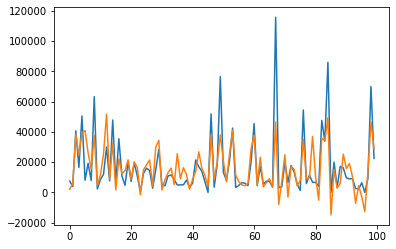

In [23]:
plt.plot(range(100), y_test[:100])
plt.plot(range(100), y_res[:100])

In [24]:
reg.score(X_test, y_test)

0.3286647092192697

In [25]:
mean_squared_error(y_test, y_res)

421799834.4229376

In [39]:
errors = []
for i in range(1, 15):
    dt = DecisionTreeRegressor(max_depth=i, random_state=42)
    dt.fit(X_train, y_train)
    y_res = dt.predict(X_test)
    errors.append(mean_squared_error(y_test, y_res))

In [40]:
errors

[532695810.55537754,
 442911177.57442355,
 368338908.307972,
 347149687.2825448,
 358542220.9434157,
 268276113.01048207,
 335483733.9886194,
 330205051.1081275,
 291038315.94060105,
 344907973.33584946,
 353226526.3516309,
 369633626.4217974,
 383952300.87464607,
 383551991.3014298]

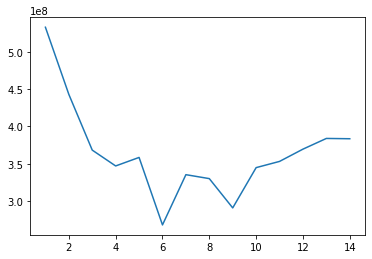

In [41]:
plt.plot(range(1, 15), errors)

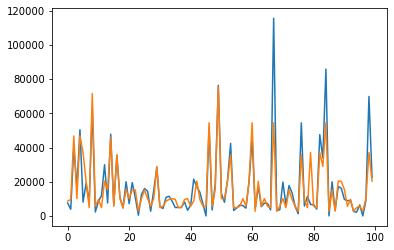

In [29]:
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)
y_res = dt.predict(X_test)
plt.plot(range(100), y_test[:100])
plt.plot(range(100), y_res[:100])

In [279]:
dt.score(X_test, y_test)

0.5354644575934457

In [266]:
reg = MLPRegressor(random_state=1, max_iter=10000)
reg.fit(X_train, y_train)

MLPRegressor(max_iter=10000, random_state=1)

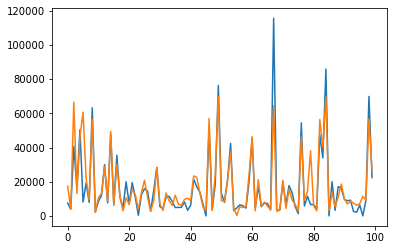

In [281]:
y_res = reg.predict(X_test)
plt.plot(range(100), y_test[:100])
plt.plot(range(100), y_res[:100])

In [282]:
mean_squared_error(y_test, y_res)

270486218.1850499

In [283]:
reg.score(X_test, y_test)

0.5694949852555803

In [287]:
net = sps.somNet(20, 20, X_train, PBC=True)
net.train(0.01, 20000)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


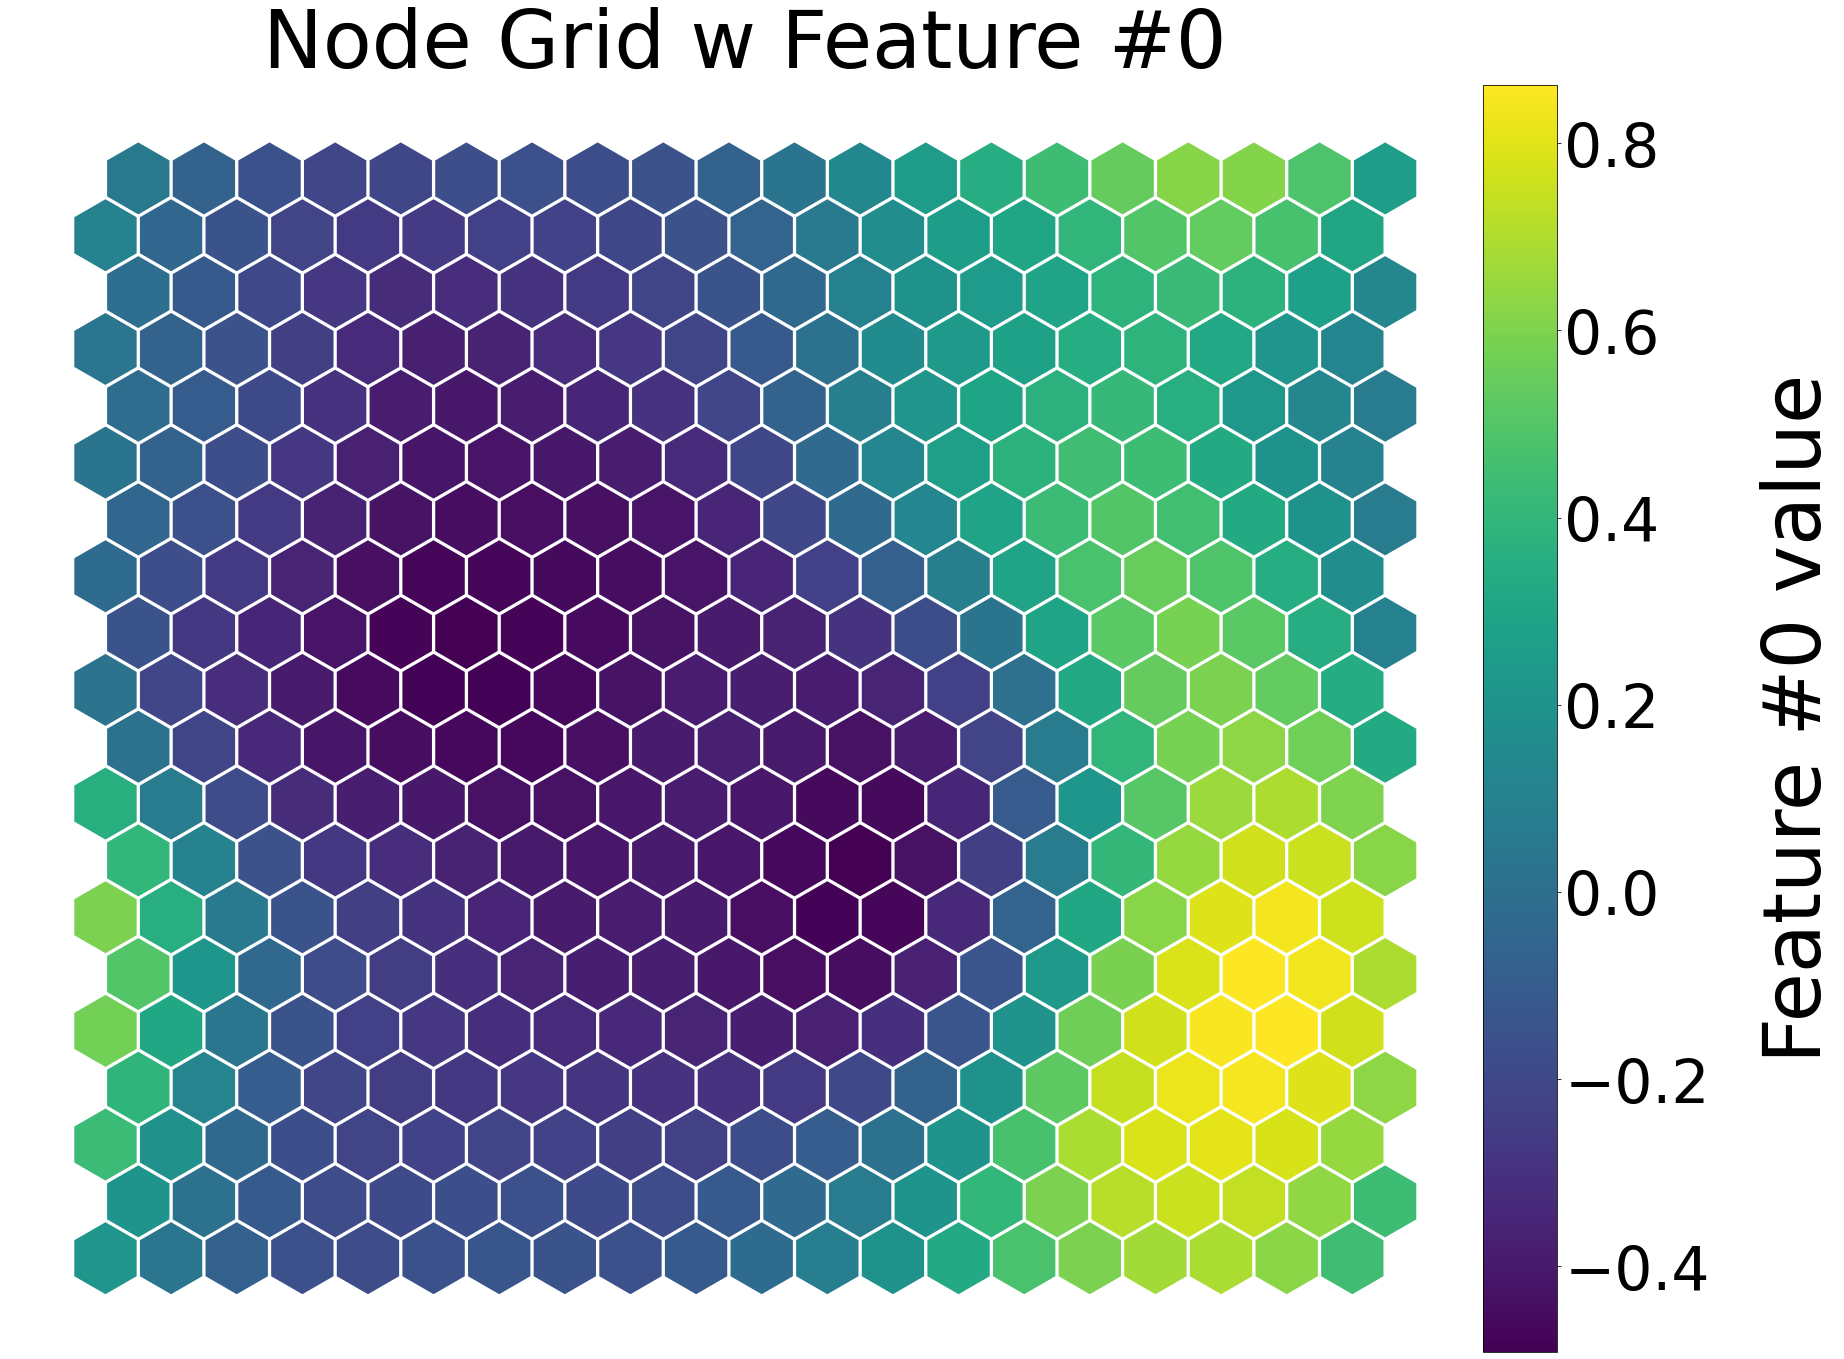

In [288]:
net.nodes_graph(colnum=0)

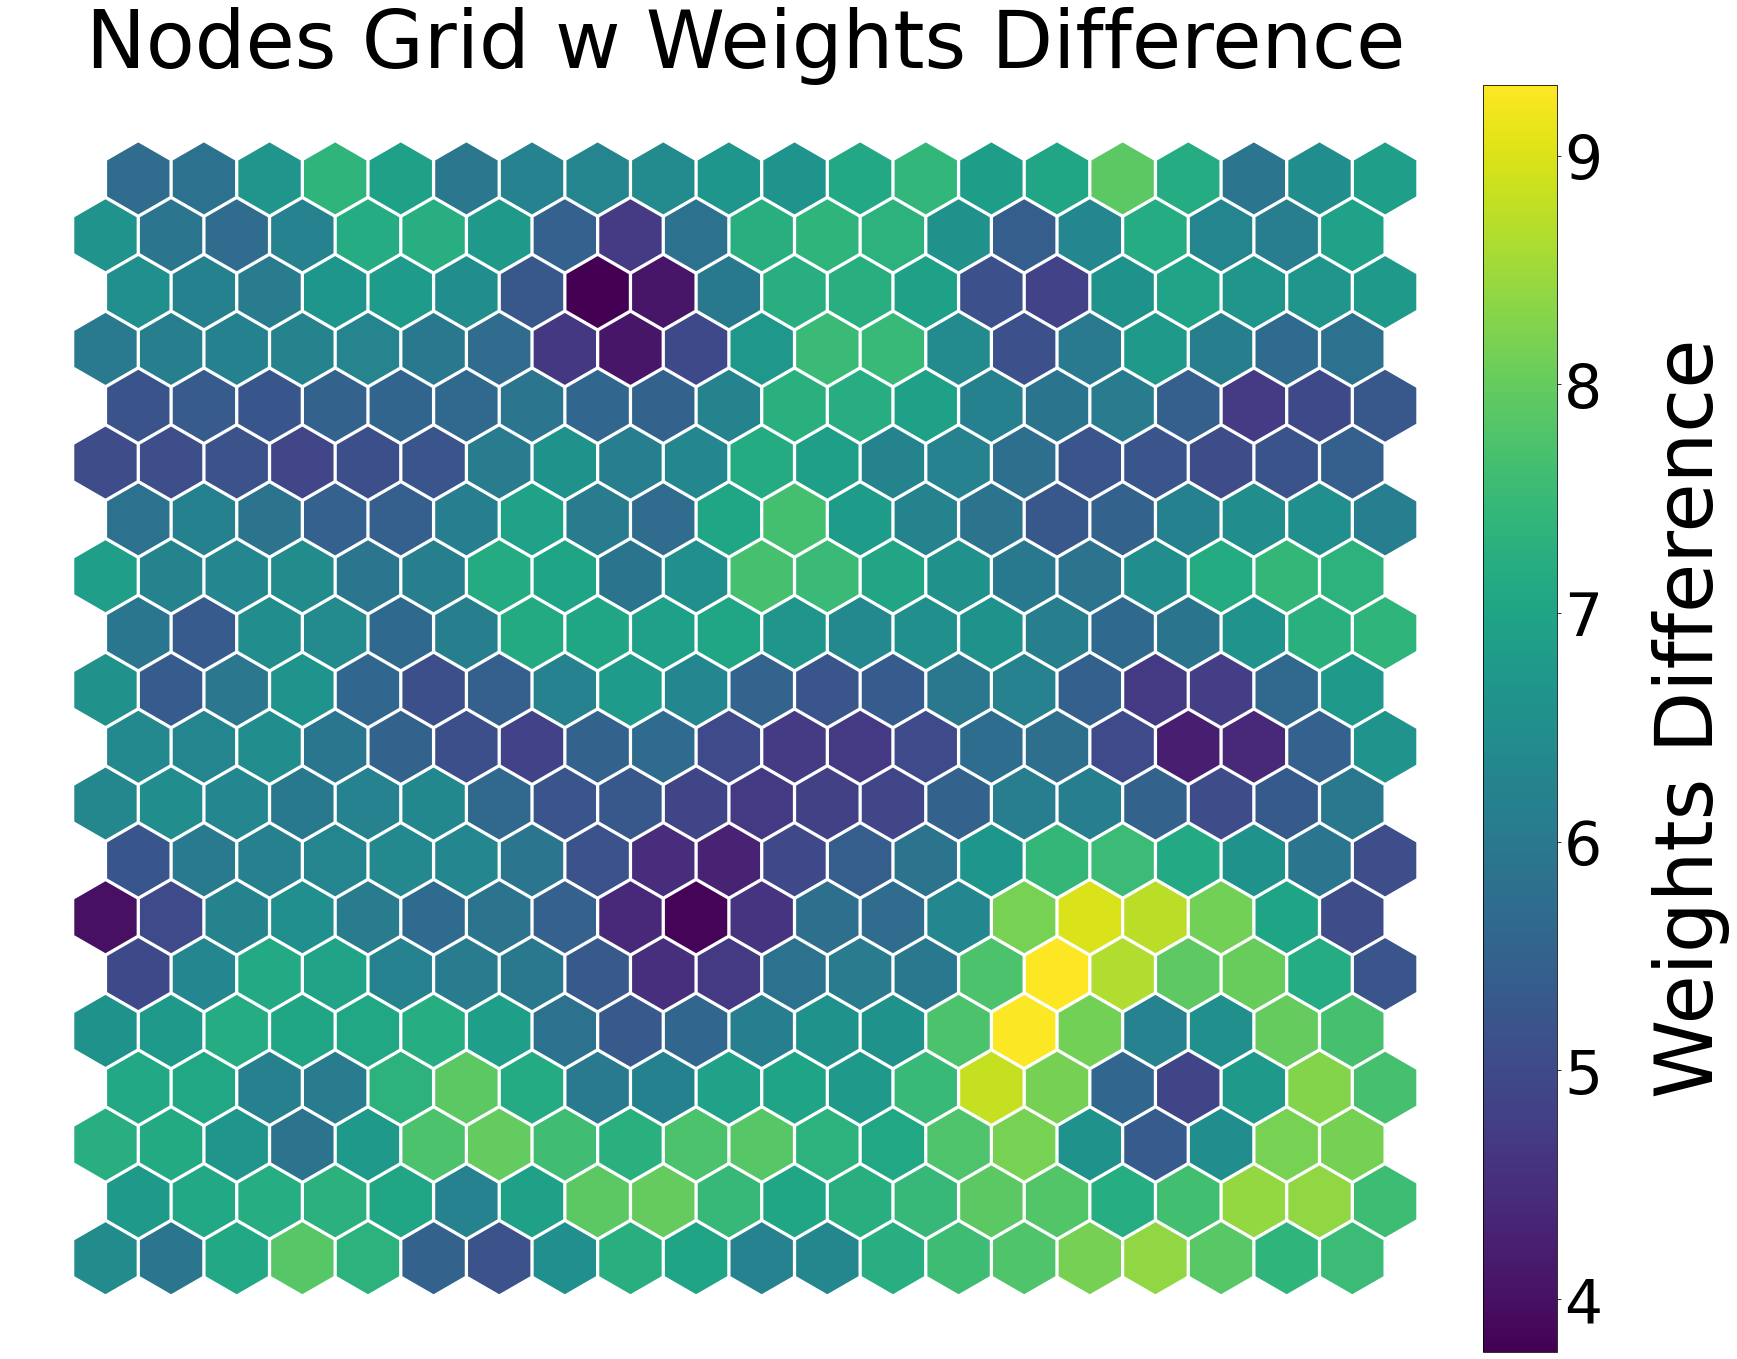

In [300]:
net.diff_graph()

In [315]:
df = pd.read_csv('BreadBasket_DMS.csv')
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [316]:
df['Item'].value_counts()

Coffee          5471
Bread           3325
Tea             1435
Cake            1025
Pastry           856
                ... 
Raw bars           1
The BART           1
Gift voucher       1
Chicken sand       1
Adjustment         1
Name: Item, Length: 95, dtype: int64

<AxesSubplot:>

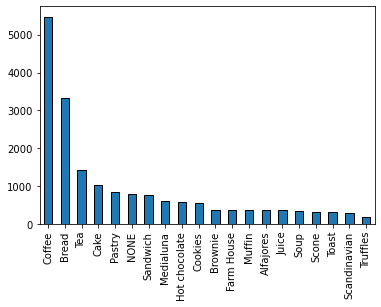

In [317]:
df['Item'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=1)

In [322]:
df = df.groupby(['Transaction', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')
df.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [323]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

df = df.applymap(encode_units)
df.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [327]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Coffee),0.036093,0.475081,0.019515,0.540698,1.138116,0.002368,1.142861
1,(Coffee),(Alfajores),0.475081,0.036093,0.019515,0.041078,1.138116,0.002368,1.005199
2,(Pastry),(Bread),0.085510,0.324940,0.028958,0.338650,1.042194,0.001172,1.020731
3,(Bread),(Pastry),0.324940,0.085510,0.028958,0.089119,1.042194,0.001172,1.003961
4,(Brownie),(Coffee),0.039765,0.475081,0.019515,0.490765,1.033013,0.000624,1.030799
5,(Coffee),(Brownie),0.475081,0.039765,0.019515,0.041078,1.033013,0.000624,1.001369
6,(Coffee),(Cake),0.475081,0.103137,0.054349,0.114399,1.109196,0.005350,1.012717
7,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667
8,(Hot chocolate),(Cake),0.057916,0.103137,0.011331,0.195652,1.897010,0.005358,1.115019
9,(Cake),(Hot chocolate),0.103137,0.057916,0.011331,0.109868,1.897010,0.005358,1.058364


In [328]:
rules[(rules['lift'] >= 1) & (rules['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Coffee),0.036093,0.475081,0.019515,0.540698,1.138116,0.002368,1.142861
7,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667
12,(Cookies),(Coffee),0.054034,0.475081,0.028014,0.518447,1.091280,0.002343,1.090053
15,(Hot chocolate),(Coffee),0.057916,0.475081,0.029378,0.507246,1.067704,0.001863,1.065276
17,(Juice),(Coffee),0.038296,0.475081,0.020460,0.534247,1.124537,0.002266,1.127031
18,(Medialuna),(Coffee),0.061379,0.475081,0.034939,0.569231,1.198175,0.005779,1.218561
22,(NONE),(Coffee),0.079005,0.475081,0.042073,0.532537,1.120938,0.004539,1.122908
24,(Pastry),(Coffee),0.085510,0.475081,0.047214,0.552147,1.162216,0.006590,1.172079
26,(Sandwich),(Coffee),0.071346,0.475081,0.037981,0.532353,1.120551,0.004086,1.122468
28,(Scone),(Coffee),0.034309,0.475081,0.017941,0.522936,1.100729,0.001642,1.100310
